In [1]:
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy
from PIL import Image
import argparse
import os
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from tensorboard_logger import configure, log_value

from newmodel import Generator, Discriminator, FeatureExtractor #, patchDiscriminator
from utilsnew import Visualizer2, SingleImage

In [2]:
batchsize=2; contloss='l2';cuda=True;losfac=1.0; lrD=0.0001;
dataroot='../Main/Img/';disstep=1; gEpochs=2; imagesize=200;  lrG=1e-05;
nEpochs=25; netD=''; netG=''; out='models/26febtest'; workers=4

In [3]:
 print(torch.__version__)

0.3.1


L2 content loss


/home/nfs/shubham9/nis/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


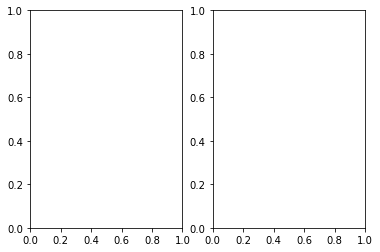

In [4]:
try:
    os.makedirs(out)
except OSError:
    pass

if torch.cuda.is_available() and not cuda:
    print("WARNING: You have a CUDA device, so you should probably run with --cuda")


normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

trans = transforms.Compose([transforms.Resize((imagesize,imagesize)), 
                                transforms.ToTensor(),
                                normalize,]) #upSampling

revtransform = transforms.Compose(
                [transforms.Normalize(mean = [-2.118, -2.036, -1.804], #Equivalent to un-normalizing ImageNet (for correct visualization)
                                    std = [4.367, 4.464, 4.444]),
                ]
                )


datasetfake = SingleImage(imageFolder= os.path.join(dataroot, 'test') ,
                                transform=trans)
datasetreal = SingleImage(imageFolder= os.path.join(dataroot, 'test') ,
                                transform=trans)


dataloaderfake = torch.utils.data.DataLoader(datasetfake, batch_size=batchsize,
                                         shuffle=True, num_workers=int(workers))


dataloaderreal = torch.utils.data.DataLoader(datasetreal, batch_size=batchsize,
                                         shuffle=True, num_workers=int(workers))


netG = Generator() 
netD = Discriminator()
# netDp = patchDiscriminator(patchH,patchW)

# For the content loss
# feature_extractor = FeatureExtractor(torchvision.models.vgg19(pretrained=True))
# print feature_extractor
if contloss=='l2':
    print('L2 content loss')
    content_criterion = nn.MSELoss()
else:
    print('L1 content loss')
    content_criterion = nn.L1Loss()

adversarial_criterion = nn.BCELoss()
target_real = Variable(torch.ones(batchsize,1))
target_fake = Variable(torch.zeros(batchsize,1))

netG.cuda()
netD.cuda()
content_criterion.cuda()
adversarial_criterion.cuda()
target_real = target_real.cuda()
target_fake = target_fake.cuda()

optimG = optim.Adam(netG.parameters(), lr=lrG)
optimD = optim.SGD(netD.parameters(), lr=lrD, momentum=0.9, nesterov=True)

configure('logs/' + 'image-' + str(out) + str(batchsize) + '-' + str(lrG) + '-' + str(lrD), flush_secs=5)
visualizer = Visualizer2()
dire ='resultimages/' +str(out) +'/'
if not os.path.exists(dire):
    os.makedirs(dire)

inputsG = torch.FloatTensor(batchsize, 3, imagesize, imagesize)
inputsGimg = torch.FloatTensor(batchsize, 3, imagesize, imagesize)
inputsGreal = torch.FloatTensor(batchsize, 3, imagesize, imagesize)

Generator pre-training


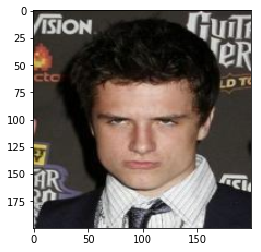

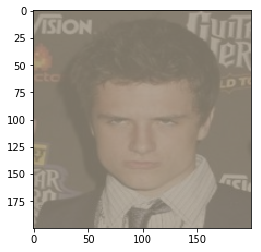

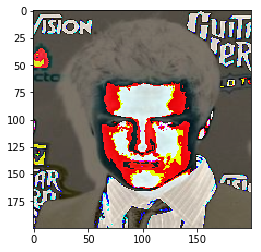

In [16]:
count =0
# Pre-train generator
print 'Generator pre-training'
for i, data in enumerate(dataloaderreal):
    # Generate data
    inputs = deepcopy(data)
    
    fig=plt.figure()
    a=deepcopy(np.uint8((revtransform(inputs[0]).numpy()*255)))
    a=np.swapaxes(np.swapaxes(a,0,1),1,2)
    fig=plt.imshow(a)
    plt.show()
    
    fig=plt.figure()
    b=deepcopy(np.uint8((revtransform(inputs[0]).numpy()*255)))
    b=np.swapaxes(np.swapaxes(b,0,1),1,2)
    fig=plt.imshow(b)
#     print(a)
#     raw_input()
#     print(b)
#     raw_input()
    plt.show()
    fig=plt.figure()
    fig=plt.imshow(b-a)
    plt.show()
#     w=10
#     h=10
#     fig=plt.figure(figsize=(8, 8))
#     columns = 2
#     rows = 1
#     fig.add_subplot(rows, columns, 1)
#     plt.imshow(revtransform(inputs[0]))
#     fig.add_subplot(rows, columns, 2)
#     plt.imshow(np.array(revtransform(inputs[0])))
#     plt.show()
#     images = [revtransform(inputs[0]), revtransform(inputs[0])]
#     widths, heights = zip(*(i.size for i in images))
#     print(images[1])
#     print(images[0])
#     total_width = sum(widths)
#     max_height = max(heights)

#     new_im = Image.new('RGB', (total_width, max_height))

#     x_offset = 0
#     for im in images:
#         new_im.paste(im, (x_offset,0))
#         x_offset += im.size[0]
    
#     plt.figure()
#     plt.imshow(new_im)
#     plt.show()
#     new_im.save('./resultimages/' +name +'/'+ str(count)+'.jpg')
#     for j in range(batchsize):
#         inputsG[j] = deepcopy(inputs[j])
#         inputsGimg[j] = deepcopy(inputs[j])

#     # Generate real and fake inputs
#     orig_imag = Variable(inputsGimg.cuda())
#     outputG = netG(Variable(inputsG).cuda())
#     fig=plt.figure()
#     fig=plt.imshow(revtransform(orig_imag.cpu().data[0]))
#     fig.show()
    
# #     num_same = orig_imag.cpu().data[0].eq(inputs[0]).sum()
# #     num_total = inputs[0].numel()
# #     print(num_same, num_total)

#     plt.figure()
#     plt.imshow(np.array(revtransform(inputs[0])))
#     plt.show()
#     plt.close()

# #     fig=plt.figure()
# #     fig=plt.imshow(revtransform(outputG.cpu().data[0]))
# #     fig.show()

#     ######### Train generator #########
#     netG.zero_grad()
#     lossG_content = content_criterion(outputG, orig_imag)
#     lossG_content.backward()

#     # Update generator weights
#     optimG.step()
    break
    # Status and display
    if i%5==0:
        # print(orig_imag.data)
        # print(outputG.data)
        print('[%d/%d][%d/%d] Loss_G: %.4f'% (epoch, gEpochs, i, len(dataloaderreal), lossG_content.data[0],))
        count= visualizer.show(orig_imag.cpu().data, inputsGimg , count, str(out))#outputG.cpu().data

Generator pre-training


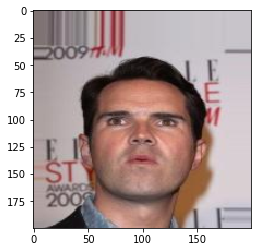

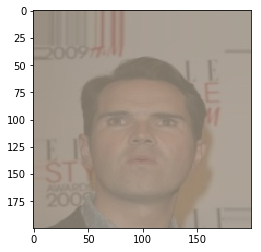

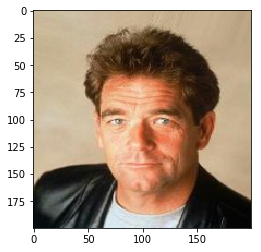

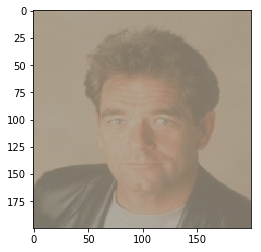

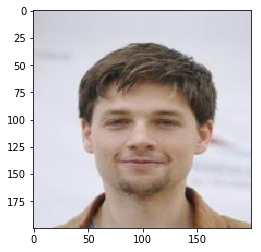

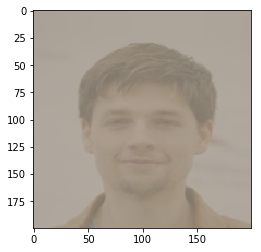

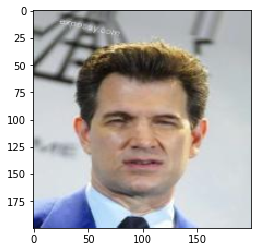

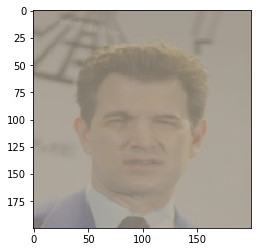

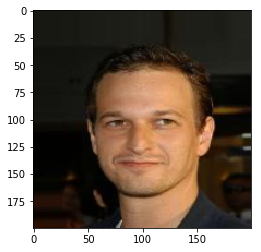

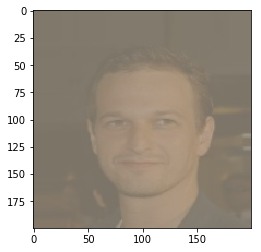

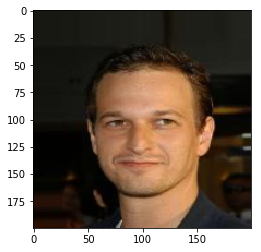

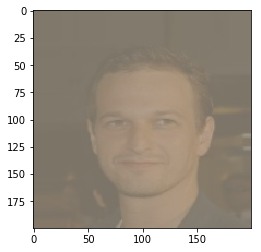

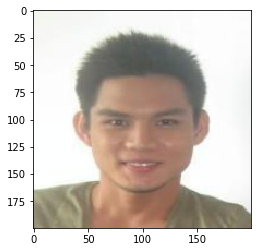

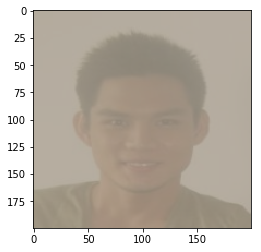

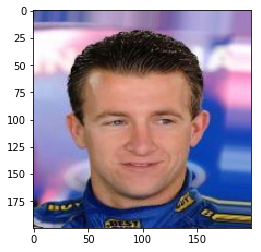

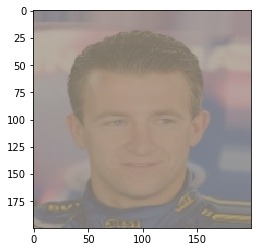

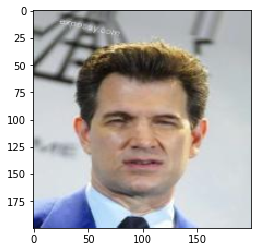

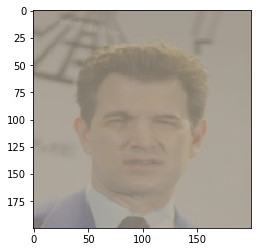

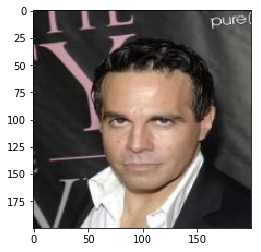

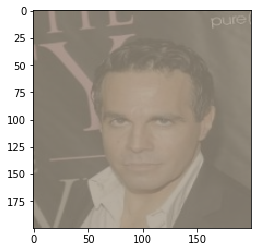

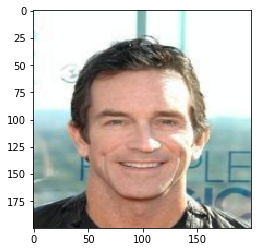

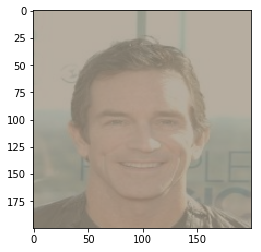

In [6]:
count =0
# Pre-train generator
print 'Generator pre-training'
for i, data in enumerate(dataloaderreal):
    # Generate data
    inputs = data
    
    fig=plt.figure()
    a=np.uint8((revtransform(inputs[0]).numpy()*255))
    a=np.swapaxes(np.swapaxes(a,0,1),1,2)
    fig=plt.imshow(a)

    fig=plt.figure()
    a=np.uint8((revtransform(inputs[0]).numpy()*255))
    a=np.swapaxes(np.swapaxes(a,0,1),1,2)
    fig=plt.imshow(a)
    plt.show()